In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt

In [2]:
# import data
air_sat = pd.read_csv("data/airline_satisfaction.csv", index_col=0)

### Q1.3 & 1.4 : Side by side and Stacked Column Chart

In [3]:
rating_counts = pd.DataFrame()
for col in  ["seat_comfort", "checkin_service", "inflight_service", "cleanliness"]:
    #rating_counts = rating_counts.append(air_sat.groupby(col)[col].count())
    rating_counts = pd.concat([rating_counts, air_sat.groupby(col)[col].count().to_frame().transpose()], axis=0)

In [4]:
rating_counts

,1,2,3,4,5
seat_comfort,122,126,180,314,258
checkin_service,118,115,295,257,215
inflight_service,72,97,188,396,247
cleanliness,131,138,237,258,236


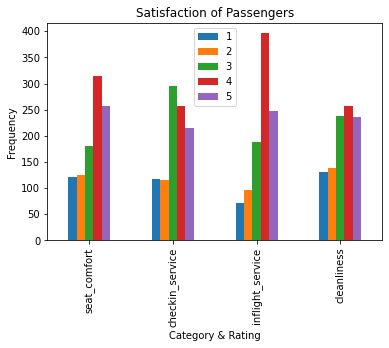

In [5]:
ax = rating_counts.plot.bar()
ax.set_xlabel("Category & Rating")
ax.set_ylabel("Frequency")
ax.set_title("Satisfaction of Passengers");

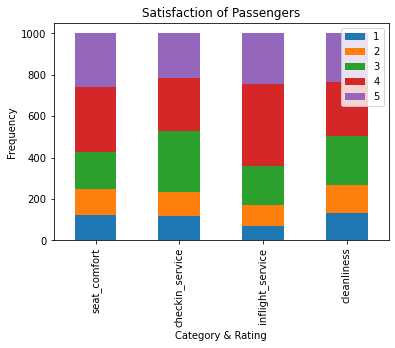

In [6]:
ax = rating_counts.plot.bar(stacked=True)
ax.set_xlabel("Category & Rating")
ax.set_ylabel("Frequency")
ax.set_title("Satisfaction of Passengers");

### Q2.1: Seat Comfort

| Age Group  | Ages               |
| ---:       | :---               |
| 0-17       | Child              |
| 18-24      | Young Adult        |
| 25-34      | Middle-Aged Adults |
| 35-59      | Older Adults       |
| 60+        | Senior Adults      |

In [7]:
# define function to transform age group
def convert_age_group(age):
    '''
    a function to convert the age to the relevant age group
    '''
    if age <= 17:
        return "Children"
    if age <= 24:
        return "Young Adult"
    if age <= 34:
        return "Middle-Aged Adults"
    if age <= 59:
        return "Older Adults"
    else:
        return "Senior Adults"

In [8]:
# add a new column to save the computed age_group
air_sat['age_group'] = air_sat.age.apply(convert_age_group)

In [9]:
age_counts = air_sat.groupby(['age_group'])['age_group'].count()
age_rating_counts = air_sat.groupby(['age_group', 'seat_comfort'])['seat_comfort'].count()

# as the sizes of age groups are now not the same, we find the average rather than the total
age_rating_proportions = age_rating_counts / age_counts

In [10]:
age_counts

age_group
Children               84
Middle-Aged Adults    207
Older Adults          515
Senior Adults          83
Young Adult           111
Name: age_group, dtype: int64

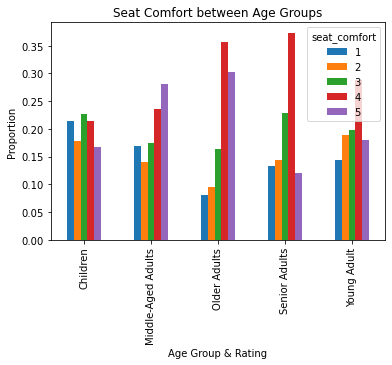

In [13]:
ax = age_rating_proportions.unstack().plot.bar()
ax.set_xlabel("Age Group & Rating")
ax.set_ylabel("Proportion")
ax.set_title("Seat Comfort between Age Groups");

#### Note that the above plot has reordered the order of the Age groups. 
We would like to present the age groups in the order of 'Children', 'Young Adult', 'Middle-Aged Adults', 'Older Adults', 'Senior Adults'
<br> Let's try to fix that now (there are many ways to do this. I thought the following is simpler)

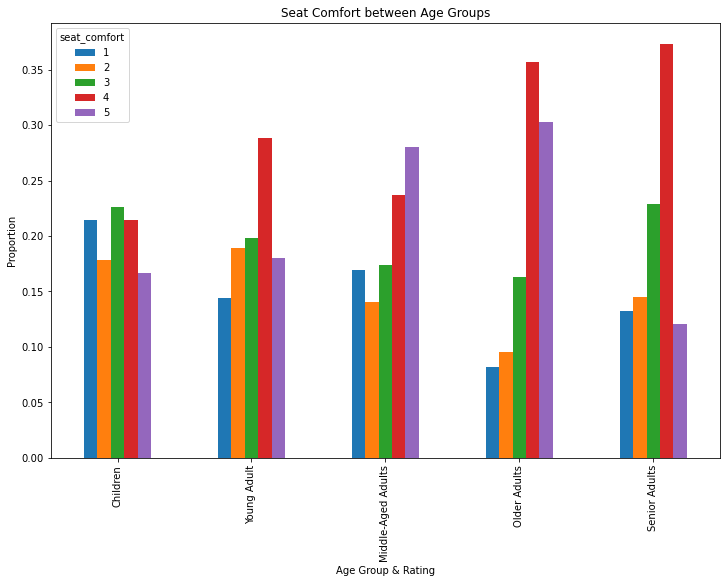

In [74]:
age_groups_ordered = ['Children', 'Young Adult', 'Middle-Aged Adults', 'Older Adults', 'Senior Adults']
ax = age_rating_proportions.unstack().loc[age_groups_ordered].plot.bar(figsize=(12, 8))
ax.set_xlabel("Age Group & Rating")
ax.set_ylabel("Proportion")
ax.set_title("Seat Comfort between Age Groups");

### Q2.2: All Categories

In [46]:
age_counts = air_sat.groupby(['age_group'])['age_group'].count()

In [47]:
age_counts

age_group
Children               84
Middle-Aged Adults    207
Older Adults          515
Senior Adults          83
Young Adult           111
Name: age_group, dtype: int64

In [48]:
age_all_ratings = air_sat.groupby(['age_group'])[["seat_comfort", "checkin_service", "inflight_service", "cleanliness"]].mean()

In [49]:
age_all_ratings

,seat_comfort,checkin_service,inflight_service,cleanliness
age_group,,,,
Children,2.940476,3.166667,3.750000,2.952381
Middle-Aged Adults,3.318841,3.251208,3.729469,3.304348
Older Adults,3.704854,3.491262,3.654369,3.471845
Senior Adults,3.204819,3.084337,3.228916,3.048193
Young Adult,3.171171,3.090090,3.711712,3.216216


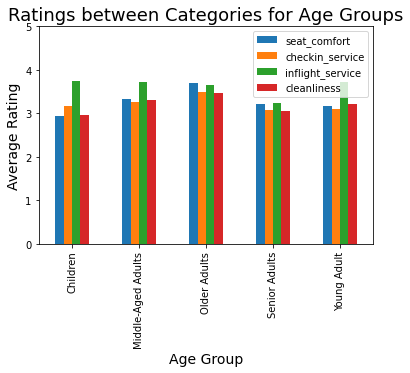

In [50]:
ax = age_all_ratings.plot.bar()
ax.set_xlabel("Age Group", size=14)
ax.set_ylabel("Average Rating", size=14)
ax.set_title("Ratings between Categories for Age Groups", size=18)
ax.set_ylim(0, 5);

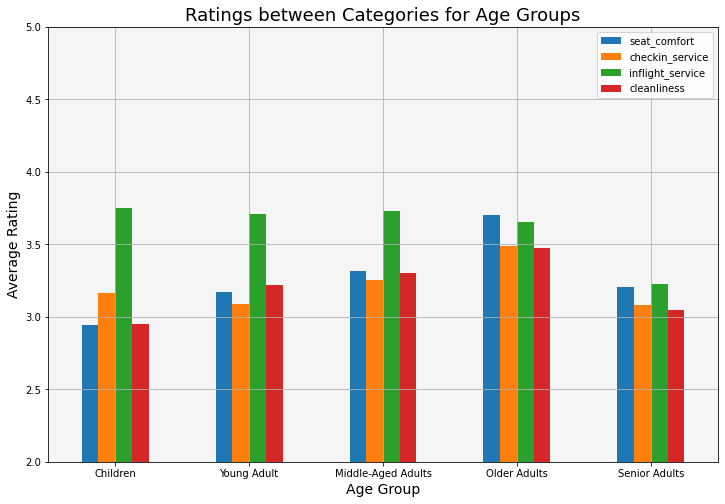

In [84]:
# plotting with corrected age order and other adjustments
age_groups_ordered = ['Children', 'Young Adult', 'Middle-Aged Adults', 'Older Adults', 'Senior Adults']

ax = age_all_ratings.loc[age_groups_ordered].plot.bar(figsize=(12, 8))
ax.set_xlabel("Age Group", size=14)
ax.set_ylabel("Average Rating", size=14)
ax.set_title("Ratings between Categories for Age Groups", size=18)

# changing the y_lim
ax.set_ylim(2, 5)

# Rotates X-Axis Ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation = 360) 

# show gridlines
ax.grid(visible=True)

# set face color
ax.set_facecolor('whitesmoke') 

# set legend location
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(loc=1); # 1 is upper right

In [ ]:
# https://matplotlib.org/stable/gallery/color/named_colors.html